In [25]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

train = pd.read_csv('train_zero.csv', sep =',', index_col=False)
test = pd.read_csv('test_zero.csv', sep =',', index_col=False)

In [26]:
train = train.drop(['Unnamed: 0'], axis=1)
test = test.drop(['Unnamed: 0'], axis=1)

In [27]:
train = train.drop(['NU_INSCRICAO'], axis = 1)
NU_INSCRICAO = test['NU_INSCRICAO'].values
test = test.drop(['NU_INSCRICAO'], axis = 1)

In [28]:
train.shape, test.shape

((13730, 39), (4576, 38))

Let's get our dummy variables from the columns with discrete features.

In [29]:
train.select_dtypes(['object']).columns
test.select_dtypes(['object']).columns

Index(['TP_SEXO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047'], dtype='object')

In [30]:
train_dummy = pd.get_dummies(train[train.select_dtypes(['object']).columns])
test_dummy = pd.get_dummies(test[test.select_dtypes(['object']).columns])

In [31]:
train = train.drop(train.select_dtypes(['object']).columns, axis = 1)
test = test.drop(test.select_dtypes(['object']).columns, axis = 1)

In [32]:
train = pd.concat([train, train_dummy], axis = 1)
test = pd.concat([test, test_dummy], axis = 1)
train.shape, test.shape

((13730, 81), (4576, 80))

Now we can split the data in 70%/30%

In [33]:
from sklearn.model_selection import train_test_split

y_col = 'NU_NOTA_MT'

feature_cols = [x for x in train.columns if x != y_col]
x_data = train[feature_cols]
y_data = train[y_col]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 42)

In [34]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(x_train)

x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [35]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
y_train_predicted = lr.predict(x_train)
y_test_predicted = lr.predict(x_test)

We have already fitted our model. Now, let's analyze our predictions against the responses. (lr.score will return R²)

In [37]:
lr.score(x_train, y_train), lr.score(x_test, y_test)

(0.9139856583658773, 0.91999175112622)

In [38]:
from sklearn.metrics import mean_squared_error
import math

errors = list()

errors.append(pd.Series({'train': mean_squared_error(y_train, y_train_predicted),
                           'test' : mean_squared_error(y_test,  y_test_predicted)},
                           name='errors'))

errors = pd.concat(errors, axis=1)
errors

,errors
train,4450.081808
test,4302.459809


In [39]:
y_test_list = list(y_test)
y_test_predicted_list = list(y_test_predicted)

In order to plot the fitted values versus residuals, we need to calculate the residuals first:

In [40]:
residuals = list()

for x, y in zip(y_test_list, y_test_predicted_list):
    residuals.append(x - y)

Residual Plot:

Text(0.5,0,'Fitted Values')

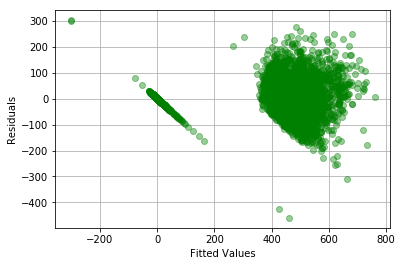

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.plot(y_test_predicted_list, residuals, color = 'green', marker = 'o', ls = '', alpha = 0.4)
plt.grid(linestyle = '-')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')

The residual plot above allows us to identify outliers in the dataset (An example is the point with residual=300).
It's possible to notify another interesting thing. There is a pattern close to the origin of the graph. As the fitted value increases, the residual is increased proportionally; a linear relationship. One possible explanation, is that in the range of this relationship, we are predicting values for responses equal to zero.
